# Plain vanilla option pricing:

Un esempio di moto Browniano geometrico (GBM) può essere la teoria Black-Scholes applicata al prezzo delle opzioni sui mercati finanziari.\
In particolare la soluzione di un GBM su alcune opzioni denominate "Europee" è anche nota analiticamente, procedere quindi alla simulazione confrontando poi i risultati.

Denotiamo con $C[S(t),t]$ il prezzo di un'opzione "Europea tipo Call"; con $P[S(t),t]$ denotiamo, invece, il prezzo di un'opzione Europea di tipo "Put".

Fondamentale per stabilire o meno la convenienza di tali opzioni è stimare, nel caso specifico con una tecnica tipo Monte Carlo, il valore monetario $S(t)$ del bene al tempo T in cui si vorrebbe idealmente far valere l'opzione Europea così da stabilire tra le parti anticipatamente l'acquisto di tale bene ad un valore K adeguato.

Si ricorda che $S\sim GBM(\mu,\sigma^2)$; dato un valore iniziale $S(0)$, allora per ogni tempo t:
$$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
dove $W(t)\sim\mathcal{N}(0,t)$.\
Nell'ipotesi di incrementi finiti, indipendenti e normalmente distribuiti è possibile ricavare la seguente formula ricorsiva:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
con $Z_i \sim \mathcal{N}(0,1)$

Quindi si possono ricavare i valori stimati di $C[S(t),t]$ e $P[S(t),t]$ secondo: 

$$ C= exp(-rT) \ max[0,S(T)-K] \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ P= exp(-rT) \ max[0,K-S(T)]$$

Si stabiliscono arbitrariamente le costanti:
- prezzo del bene a t = $0$: $S(0)=100$;
- tempo consegna: $T=1$;
- prezzo pattuito: $K=100$;
- rateo di interesse garantito (banca): $r=0.1$;
- volatilità del mercato: $\sigma=0.25$;

Eseguire 2 simulazioni per ogni tipo di opzione:
- con una stima unica da t = $0$ a t = $T$;
- con un numero pari a $10^2$ tempi intermedi uniformi in $[0,T]$;

Con il metodo delle medie a blocchi, infine, determinare la migliore stima delle osservabili $C[S(t),t]$ e $P[S(t),t]$ e gli errori associati.\
A tal proposito si definiscono le seguenti funzioni: 

In [1]:

import math


def Media (X, n) :              #attenzione: n è la posizione nell'array
    return sum( X[:n+1] )/(n+1)

def Err (X, n):             #attenzione n è la posizione nell'array, vale N=(n+1) ovvero (N-1)=n
    if n==0 :
        return 0
    return math.sqrt( (Media(X**2, n) - Media(X, n)**2) / n )


#### - Previsione diretta
Si importano i risultati ottenuti dalla simulazione diretta del valore $S(T)$, con cui poi sono stati calcolati 100 blocchi di 100 valori delle osservabili $C$ e $P$.

In [2]:

import numpy


C, P= numpy.loadtxt( "sim_unico_out.txt", usecols= (0,1), delimiter= "\t", unpack= 'true' )
    

Si graficano le medie parziali con errori dell'opzione europea di Call, e ne si dà la migliore stima numerica con errore.

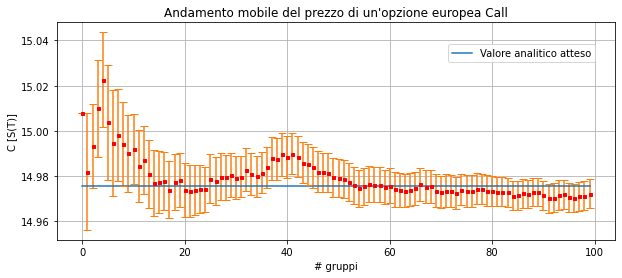

Opzione Call
- valore medio: 14.972
- errore:       0.006


In [3]:

import matplotlib.pyplot as plt


AvC= numpy.zeros( numpy.size(C) )
dev_AvC= numpy.zeros( numpy.size(C) )

for i in range( numpy.size(C) ):
    AvC[i]= Media (C, i)
    dev_AvC[i]= Err (C, i)
    
N = numpy.arange ( numpy.size(C) )    

plt.figure(figsize=(10, 4))
plt.plot (14.975790778311286+numpy.zeros(100), label= "Valore analitico atteso")
plt.errorbar( N, AvC, yerr= dev_AvC, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('C [S(T)]')
plt.title("Andamento mobile del prezzo di un'opzione europea Call")
plt.grid(True)
plt.legend(bbox_to_anchor=(0.7, 0.9), loc='upper left', borderaxespad=0.)

plt.show()

print("Opzione Call")
print("- valore medio:", round(AvC[99],3))
print("- errore:      ", round(dev_AvC[99],3))


Analogamente per l'opzione Put.

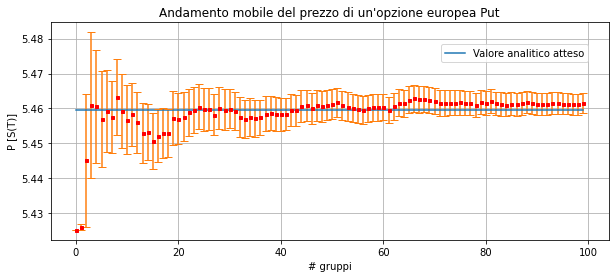

Opzione Put
- valore medio: 5.461
- errore:       0.003


In [4]:

AvP= numpy.zeros( numpy.size(P) )
dev_AvP= numpy.zeros( numpy.size(P) )

for i in range( numpy.size(P) ):
    AvP[i]= Media (P, i)
    dev_AvP[i]= Err (P, i)  

plt.figure(figsize=(10, 4))
plt.plot (5.4595325819072364+numpy.zeros(100), label= "Valore analitico atteso")
plt.errorbar( N, AvP, yerr= dev_AvP, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('P [S(T)]')
plt.title("Andamento mobile del prezzo di un'opzione europea Put")
plt.grid(True)
plt.legend(bbox_to_anchor=(0.7, 0.9), loc='upper left', borderaxespad=0.)

plt.show()

print("Opzione Put")
print("- valore medio:", round(AvP[99],3))
print("- errore:      ", round(dev_AvP[99],3))


Grazie anche ad un valore di riferimento riportato nei grafici si può osservare come i valori stimati, corredati di incertezza statistica calcolata come deviazione standard della media, siano compatibili con i valori attesi dai calcoli analitici noti.

Si osservi, infine, un restringimento dell'errore con il numero di gruppi considerati che da, inoltre, consistenza e una certa accuratezza alla stima, sebbene il numero di simulazioni totali non sia eccessivamente elevato.

#### - Previsione a tempi discreti
Si divide uniformemente in $10^2$ sotto-intervalli l'intervallo di stima $[0,T]$, e si stimano i valori di $C$ e $P$ passo passo fino al tempo finale.

Si importino i risultati della simulazione.

In [5]:

Cs, Ps= numpy.loadtxt( "sim_salti_out.txt", usecols= (0,1), delimiter= "\t", unpack= 'true' )


Si graficano le medie parziali con errori dell'opzione europea di Call, e ne si dà la migliore stima numerica con errore.

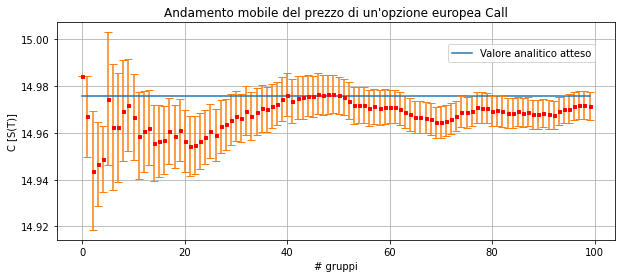

Opzione Call
- valore medio: 14.971
- errore:       0.006


In [6]:

AvCs= numpy.zeros( numpy.size(Cs) )
dev_AvCs= numpy.zeros( numpy.size(Cs) )

for i in range( numpy.size(Cs) ):
    AvCs[i]= Media (Cs, i)
    dev_AvCs[i]= Err (Cs, i)

plt.figure(figsize=(10, 4))
plt.plot (14.975790778311286+numpy.zeros(100), label= "Valore analitico atteso")
plt.errorbar( N, AvCs, yerr= dev_AvCs, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('C [S(T)]')
plt.title("Andamento mobile del prezzo di un'opzione europea Call")
plt.grid(True)
plt.legend(bbox_to_anchor=(0.7, 0.9), loc='upper left', borderaxespad=0.)

plt.show()

print("Opzione Call")
print("- valore medio:", round(AvCs[99],3))
print("- errore:      ", round(dev_AvCs[99],3))


Analogamente per l'opzione Put.

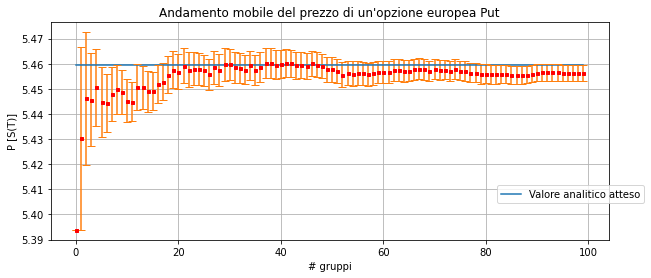

Opzione Put
- valore medio: 5.456
- errore:       0.003


In [7]:

AvPs= numpy.zeros( numpy.size(Ps) )
dev_AvPs= numpy.zeros( numpy.size(Ps) )

for i in range( numpy.size(Ps) ):
    AvPs[i]= Media (Ps, i)
    dev_AvPs[i]= Err (Ps, i)  

plt.figure(figsize=(10, 4))
plt.plot (5.4595325819072364+numpy.zeros(100), label= "Valore analitico atteso")
plt.errorbar( N, AvPs, yerr= dev_AvPs, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('P [S(T)]')
plt.title("Andamento mobile del prezzo di un'opzione europea Put")
plt.grid(True)
plt.legend(bbox_to_anchor=(0.8, 0.25), loc='upper left', borderaxespad=0.)

plt.show()

print("Opzione Put")
print("- valore medio:", round(AvPs[99],3))
print("- errore:      ", round(dev_AvPs[99],3))


Le stime ottenute risultano compatibili con il modello analitico fornito.

Infine, si noti, come di consueto, l'andamento dell'errore con l'aumentare del numero di gruppi.

Rispetto al caso di stima con in un unico passaggio, l'errore risulta del medesimo ordine di grandezza, ed i valori ottenuti per assurdo più lontani in termini di deviazioni standard della media dal valore analitico; tuttavia una divisione in sotto-intervalli dovrebbe permettere di valutare in maniera migliore i differenziali, sebbene ogni errore di approssimazione possa andare a propagarsi e sommarsi nelle stime consecutive.\
Per la precisione richiesta non si vedono effettive differenze, probabilmente anche per via di correlazioni statistiche o di simulazione, tuttavia una stima discreta è in molti ambiti riconosciuta migliore anche a livello di efficienza per raggiungere precisioni elevate.